In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


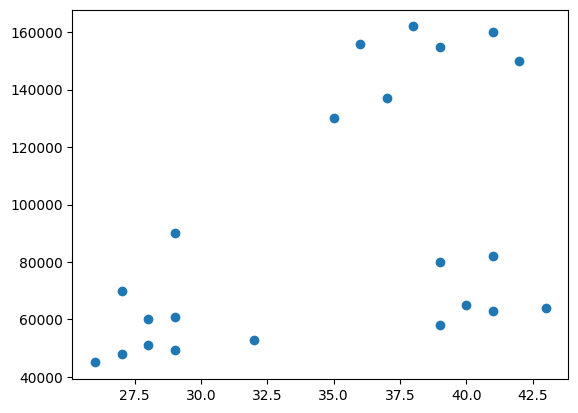

In [2]:
plt.scatter(df["Age"], df["Income($)"])
plt.show()

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init="auto")
km.fit(df[["Age", "Income($)"]])
km.labels_

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [5]:
df["cluster"] = km.labels_
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


<Axes: xlabel='Age', ylabel='Income($)'>

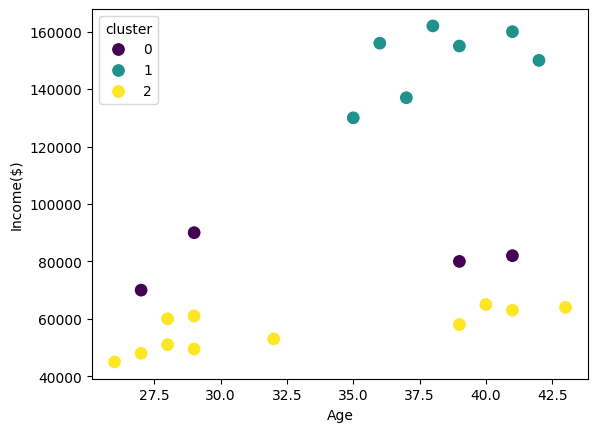

In [9]:
import seaborn as sns

sns.scatterplot(
    x="Age", y="Income($)", hue="cluster", palette="viridis", s=100, data=df
)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(
    scaler.fit_transform(df[["Age", "Income($)"]]), columns=["Age", "Income($)"]
)
df_scaled.head()
# scaler.fit_transform(df[["Age", "Income($)"]])

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [14]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init="auto")
km.fit(df_scaled[["Age", "Income($)"]])
df_scaled["Cluster"] = km.labels_
df_scaled.head()

,Age,Income($),Cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1


In [17]:
centroids = km.cluster_centers_
centroids

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

<Axes: xlabel='Age', ylabel='Income($)'>

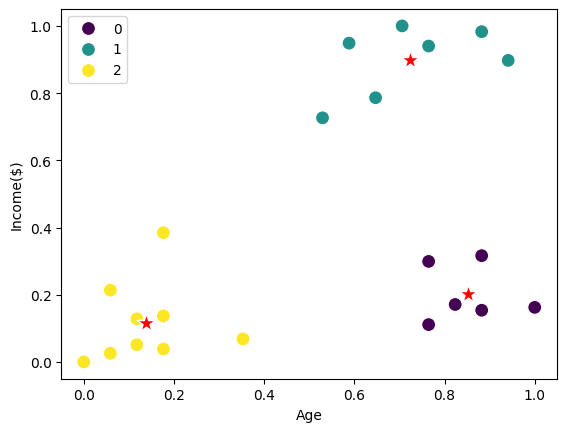

In [18]:
sns.scatterplot(
    x="Age", y="Income($)", hue="Cluster", palette="viridis", s=100, data=df_scaled
)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=200, color="red", marker="*")

In [22]:
sse = []

k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit(df_scaled[["Age", "Income($)"]])
    sse.append(km.inertia_)
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.3881529166478744,
 0.2776818715436999,
 0.2417481801197015,
 0.17299621932455467,
 0.14087951725103115,
 0.13452215882679025]

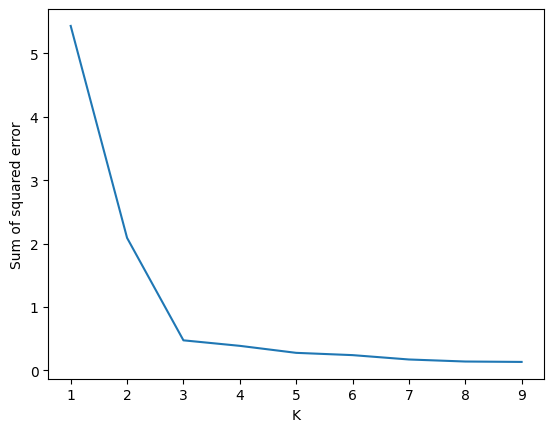

In [23]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse)
plt.show()